# GA Final Project

https://www.kaggle.com/c/nlp-getting-started

"In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified."

In [54]:
import pandas as pd

## Import data

In [231]:
train = pd.read_csv('train.csv')

In [232]:
import nltk

from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
col_tokenized = [porter.stem(word) for word in tokenized_words]

I used nltk.stem.porter before Fernando showed me an easier way, below

In [233]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [234]:
train.shape

(7613, 5)

In [235]:
X = train.text
y = train.target

## Clean the data

Remove stop words:
'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves', etc
 
Stemming/lemmatization will reduce words to their core. So like "learn" and "learning" both reduce to the term "learn".

In [236]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [237]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elisabetheldridge/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [238]:
from nltk.corpus import wordnet

In [239]:
cleaned_tweets = [clean_text(i) for i in X]

In [240]:
df_cleaned_tweets = pd.DataFrame({'tweets': cleaned_tweets})

In [241]:
df_cleaned_tweets.head()

,tweets
0,deed reason #earthquake may allah forgive u
1,forest fire near la ronge sask. canada
2,resident ask 'shelter place' notify officers. ...
3,"13,000 people receive #wildfires evacuation or..."
4,get send photo ruby #alaska smoke #wildfires p...


## Vecorize using CountVectorizer

In [242]:
from sklearn.feature_extraction.text import CountVectorizer

Can also try tfidf vectorizer (see end of the workbook)

#### CountVectorizer has min df and max df attributes
min df: include words that appear a minimum % of the time
max_features: max number of columns

In [256]:
cv = CountVectorizer(stop_words='english', min_df=.0009)

#### Comparing results for various CountVectorizer inputs

1. recall: when cost of missing one value is high 
2. precision: cost of miscategorizing/mislabelling is high 
3. f1-score: harmonic mean of recall/precision

##### Precision is important for this data set, and ideally all "1"s or "true"s should be correct


#### results without max_features, min_df = .005
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4342
           1       0.94      0.82      0.87      3271

    accuracy                           0.90      7613
   macro avg       0.91      0.89      0.89      7613
weighted avg       0.90      0.90      0.90      7613



#### min_df= .005, max_features =120
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4342
           1       0.92      0.64      0.75      3271

    accuracy                           0.82      7613
   macro avg       0.85      0.80      0.81      7613
weighted avg       0.84      0.82      0.81      7613

#### min_df = .001
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4342
           1       0.99      0.96      0.98      3271

    accuracy                           0.98      7613
   macro avg       0.98      0.98      0.98      7613
weighted avg       0.98      0.98      0.98      7613

#### min_df = .01
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      4342
           1       0.74      0.69      0.71      3271

    accuracy                           0.76      7613
   macro avg       0.76      0.75      0.75      7613
weighted avg       0.76      0.76      0.76      7613


#### min_df = .0009
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4342
           1       0.99      0.97      0.98      3271

    accuracy                           0.98      7613
   macro avg       0.98      0.98      0.98      7613
weighted avg       0.98      0.98      0.98      7613

In [257]:
X_cv = cv.fit_transform(X)

In [258]:
tokenized_words = cv.get_feature_names()

In [259]:
df_tokenized = pd.DataFrame(X_cv.todense(), columns = tokenized_words)

In [260]:
df_tokenized.shape

(7613, 1852)

## Train Test split

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_cv.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.33)


#### ^picked test_size=.33 through trial and error

recall: when cost of missing one value is high 
precision: cost of miscategorizing/mislabelling is high 
f1-score: harmonic mean of recall/precision

precision is important for this data set, and ideally all "1"s or "true"s should be correct

## Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
rf = RandomForestClassifier()

In [289]:
rf.fit(X_cv, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [290]:
from sklearn.metrics import classification_report

In [291]:
predictions = rf.predict(X_cv)

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4342
           1       0.99      0.97      0.98      3271

    accuracy                           0.98      7613
   macro avg       0.98      0.98      0.98      7613
weighted avg       0.98      0.98      0.98      7613



## Cross Validation using k-folds

In [210]:
from sklearn.cluster import KMeans

not sure if this is useful

tweets_data = []



for i in cleaned_tweets:
    tweets_data.append(i.split('|')[2].split('http:')[0].replace('RT', '').strip())
    
X = pd.DataFrame({'tweets':tweets_data})

In [211]:
#make a deep copy

X = df_cleaned_tweets.copy()

In [212]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

ValueError: could not convert string to float: 'deed reason #earthquake may allah forgive u'

In [128]:
#k-means clusters
kmeans.labels_

NameError: name 'kmeans' is not defined

In [ ]:
X['clusters'] = kmeans.labels_

In [ ]:
X.clusters.value_counts()

In [ ]:
#analyze clusters
X[X.clusters== 0].iloc[:,:-1].sum().sort_values(ascending = False).head()

In [ ]:
for i in [0,1]:
    print(i)
    print(X[X.clusters== i].iloc[:,:-1].sum().sort_values(ascending = False).head())

In [ ]:

intertias = []
n_clusters_range = range(1,10)

for i in range(1,10):
    kmeans = KMeans(n_clusers=i)
    
    kmeans.fit(X)
    
    intertia = kmeans.inertia_

    intertias.append(inertia)


In [ ]:
plt.plot(n_clusters_range,inertias)

## Feature Importance

In [270]:
df_tokenized.head()

,00,01,02,04,05,06,07,08,10,100,...,zone,û_,ûª,ûªs,ûªt,ûªve,ûï,ûïwhen,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
import seaborn as sns

In [272]:
df = pd.DataFrame({'features': df_tokenized.columns, 
              'importance': rf.feature_importances_}).sort_values('importance',ascending = False)

In [273]:
df.head(10)

,features,importance
814,http,0.043669
789,hiroshima,0.009635
286,california,0.008064
901,killed,0.007932
1543,storm,0.006643
636,fires,0.006560
1563,suicide,0.005844
270,buildings,0.005633
815,https,0.005581
1786,wildfire,0.005472


#### min_df=.005

features	importance
112	http	0.087209
113	https	0.013607
105	hiroshima	0.012996
35	california	0.012410
120	killed	0.011825
10	amp	0.011740
195	suicide	0.011683
128	like	0.010849
208	train	0.010692
119	just	0.010087


#### min_df=.001
	features	importance
739	http	0.043542
715	hiroshima	0.009460
809	killed	0.008545
254	california	0.007610
570	fires	0.007375
1391	suicide	0.007213
239	buildings	0.006289
1373	storm	0.006123
1470	train	0.006013
740	https	0.005888

#### min_df = .0009
	features	importance
814	http	0.043669
789	hiroshima	0.009635
286	california	0.008064
901	killed	0.007932
1543	storm	0.006643
636	fires	0.006560
1563	suicide	0.005844
270	buildings	0.005633
815	https	0.005581
1786	wildfire	0.005472

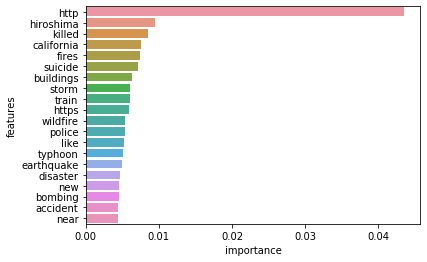

In [218]:
sns.barplot(x = 'importance', y = 'features', data = df.head(20), orient='h')

In [92]:
[i for i in df_cleaned_tweets.tweets if 'http' in i]

['@bbcmtd wholesale market ablaze http://t.co/lhyxeohy6c',
 'always try bring heavy. #metal #rt http://t.co/yao1e0xngw',
 '#africanbaze: break news:nigeria flag set ablaze aba. http://t.co/2nndbgwyei',
 'plus side look sky last night wa ablaze http://t.co/qqsmshaj3n',
 'inec office abia set ablaze - http://t.co/3imaomknna',
 'barbados #bridgetown jamaica \x89ûò two car set ablaze: santa cruz \x89ûó head st elizabeth police superintende...  http://t.co/wdueaj8q4j',
 'check out: http://t.co/roi2nsmejj http://t.co/3tj8zjin21 http://t.co/yduixefipe http://t.co/lxtjc87kls #nsfw',
 'want set chicago ablaze preaching... hotel! http://t.co/o9qknbfofx',
 'gain 3 follower last week. you? know stats grow http://t.co/tiyulif5c6',
 'west wa burned: thousand wildfire ablaze california alone http://t.co/vl5tbr3wbr',
 'check out: http://t.co/roi2nsmejj http://t.co/3tj8zjin21 http://t.co/yduixefipe http://t.co/lxtjc87kls #nsfw',
 'deputies: man shoot brighton home set ablaze http://t.co/gwnrhmso8k',
 '

In [151]:
[i for i in df_cleaned_tweets.tweets if 'https' in i]

['set heart ablaze every city wa gift every skyline wa like kiss upon lip @\x89û_ https://t.co/cyompz1a0z',
 'rene ablaze &amp; jacinta - secret 2k13 (fallen sky edit) - mar 30 2013  https://t.co/7mlmsuzv1z',
 'accident i-24 w #nashvilletraffic. traffic move 8m slower usual. https://t.co/0ghk693egj',
 '#stlouis #caraccidentlawyer speed among top cause teen accident https://t.co/k4zomof319 https://t.co/s2kxvm0cba car accident tee\x89û_',
 "'by accident' know wa gon happen https://t.co/ysxun5vceh",
 'suffield alberta accident https://t.co/bptmlf4p10',
 '.@norwaymfa #bahrain police previously die road accident kill explosion https://t.co/gfjfgtodad',
 'aftershock https://t.co/xmwodfmtui',
 'praise god ministry tell like is!!! #now #wdyouth #biblestudy https://t.co/ujk0e5gbcc',
 'aftershock https://t.co/jv8ppkhjy7',
 'unbelievably insane.\n#man #airport #airplane #aircraft #aeroplane #runway #accident #freaky\x89û_ https://t.co/cezhq7czll',
 'pilot dy plane crash car festival https://t.co/

In [153]:
[i for i in df_cleaned_tweets.tweets if 'hiroshima' in i]

['hiroshima prepare remember day bomb drop http://t.co/ojhcgzxlst',
 'guardian view hiroshima legacy: still shadow bomb | editorial: world long cas... http://t.co/rhxmghspd7',
 'hiroshima mark 70 year since bomb http://t.co/3u6mdlk7di',
 'crew #enolagay nuclear bomb board disarmed. 15 min #hiroshima get ready arm little boy http://t.co/jb25fhke6q',
 'would look like hiroshima bomb hit detroit?: thursday mark 70-year anniversary unite s... http://t.co/6sy44kyysd',
 'guardian view hiroshima legacy: still shadow bomb | editorial: world long cas... http://t.co/ct2jutvytg',
 'u.s. bomb hiroshima 70 year ago today. look war ha change since: http://t.co/uqnj6nk9y3 http://t.co/qlnnmxzfqk',
 '70 year ago hour usa a-bombed hiroshima therein kill 200000 civilians. never forget crime never repeat. peace ??',
 "'the third generation atomic bomb survivor' photo exhibition 11:00 18:00 8/6. \n#?? #hiroshima http://t.co/gvaipmlsl0",
 '70 year ago today unite state america bomb hiroshima japan.',
 "70 y

In [154]:
[i for i in df_cleaned_tweets.tweets if 'california' in i]

['13,000 people receive #wildfires evacuation order california ',
 '#rockyfire update => california hwy. 20 close direction due lake county fire - #cafire #wildfires',
 'west wa burned: thousand wildfire ablaze california alone http://t.co/vl5tbr3wbr',
 'west wa burned: thousand wildfire ablaze #california alone http://t.co/icsjgz9te1 #climate #energy http://t.co/9fxmn0l0bd',
 "@navista7 steve fire something else! california tinderbox - clown wa set 'hood ablaze @news24680",
 'arson suspect link 30 fire catch northern california http://t.co/ej2ghnafhy',
 'relaxinpr: miprv: rt latimes: arson suspect link 30 fire catch northern california http://t.co/ylhayfaoou',
 'arson suspect link 30 fire catch northern california http://t.co/wnuqqatttp (via @latimes)',
 'arson suspect link 30 fire catch northern california - los angeles time http://t.co/prrb4fhxtv',
 'arson suspect link 30 fire catch northern california http://t.co/u1fuwrgk5u',
 'arson suspect link 30 fire catch northern california h

In [155]:
[i for i in df_cleaned_tweets.tweets if 'killed' in i]

["@i_amtalia @sgc72 'thousands people displaced/injured/killed hey there's opportunity different restaurants!'",
 '@peterjukes crime killed/displaced millions. systematic torture wa carry out. look. grahamwp fire gun! arrest him!',
 "#wakeupflorida... #floridians likely killed/injured #trophyhunt killer's gun isis.  https://t.co/j5in8mexaj",
 "'three #people #killed severe #rainstorm #italian #alps cause #landslide' http://t.co/haxj6go2ac"]

In [156]:
[i for i in df_cleaned_tweets.tweets if 'suicide' in i]

['isil claim suicide bomb saudi mosque kill least 15 http://t.co/y8icf89h6w http://t.co/t9msnzv1kb',
 '@whitehouse @potus co germany invade poland japan bomb pearl harbor pre-emptive suicide http://t.co/i2aag6lp6w',
 'ara news report jan fighter infiltrate ashrafiyah district afrin aim carry suicide attacks. ypg impose curfew',
 'drown actavis suicide',
 '#saudi arabia: #abha: fatality report follow suicide bomb mosque; avoid area http://t.co/1xw0z8zeqw',
 '\x89û÷we help\x89ûª say denver firefighter work curb first responder suicide http://t.co/wtafaepukz',
 "'we help' say denver firefighter work curb first responder suicide http://t.co/avv6hpnpch",
 'photos: 17 people kill 25 injure deadly saudi mosque suicide attack http://t.co/geeknwjjsz',
 '@nalathekoala health care professional deal gun violence sequalae consider suicide injury accident homicide',
 '@mnpdnashville @montalbanony sadly suicide cop. wed 2pm @ dollar movie doe mass murder make.',
 "'gunman open fire tennessee movie th

In [157]:
[i for i in df_cleaned_tweets.tweets if 'like' in i]

['like pasta?',
 'set heart ablaze every city wa gift every skyline wa like kiss upon lip @\x89û_ https://t.co/cyompz1a0z',
 'praise god ministry tell like is!!! #now #wdyouth #biblestudy https://t.co/ujk0e5gbcc',
 'phone look like wa car ship airplane accident. terrible',
 '@tomcatarts thus explain annihilated. case survivor evolve become godlike',
 '@honeybunzgem @primalkitchen feel like pull-up one stage apocalypse.',
 'rt: zonewolf123: like youtube video http://t.co/u66kyg11zd minecraft: night lucky block mod (bob apocalypse wither 2.0 &amp; more!) mo\x89û_',
 'dad buy dvd look like science doc front read back actually impend biblical apocalypse',
 'go look grizzly peak right now... look like begin dystopian apocalypse movie',
 'like @youtube video http://t.co/ki1ykrs9fi minecraft: night lucky block mod (bob apocalypse wither 2.0 &amp; more!) mod showcase',
 'build army 100 dog leader lion dog fight like lion.',
 "spokane authority say they're struggle solve arson case like today's

# Next Steps: run gridsearch
- check if gridsearch best_estimators
- analyze out tweets put the tops words, explain why, examples

In [141]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [144]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [145]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [150]:
grid_search.fit(X, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   14.9s finished


ValueError: could not convert string to float: 'deed reason #earthquake may allah forgive u'

In [ ]:



hyper_parameters = {'n_estimators': ['warn', 100,200,300,500],'max_depth':[40,100, 200,300, None], 'min_sample_leaf':[1,2,3,4]}



#min sample leaf: [1,3,7,10,15]

In [148]:
cs = GridSearchCV(param_grid=hyper_parameters,estimator=rf)

In [149]:
cs.fit(df_tokenized,y)

ValueError: Invalid parameter min_sample_leaf for estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [112]:
min_sample_leaf.get_params().keys()

NameError: name 'min_sample_leaf' is not defined

## Alternative method: tfidf 
using sklearn

#### Results:
                precision    recall  f1-score   support

           0       0.75      0.94      0.83      1441
           1       0.87      0.57      0.69      1072

    accuracy                           0.78      2513
   macro avg       0.81      0.75      0.76      2513
weighted avg       0.80      0.78      0.77      2513

## To do: sentiment analysis

https://www.nltk.org/howto/sentiment.html
    

## To do: figure out confusion matrix
    
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

## Appendix
Notes from testing

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

In [ ]:
predictions = rf.predict(X_test)

print(classification_report(y_test, predictions))

Recall: when cost of missing one value is high
precision: cost of miscategorizing/mislabelling is high
    f1-score: harmonic mean of recall/precision

.2
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       895
           1       0.85      0.61      0.71       628

    accuracy                           0.79      1523
   macro avg       0.81      0.76      0.77      1523
weighted avg       0.80      0.79      0.78      1523



.25
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1095
           1       0.87      0.58      0.69       809

    accuracy                           0.78      1904
   macro avg       0.81      0.76      0.76      1904
weighted avg       0.80      0.78      0.77      1904


.33               precision    recall  f1-score   support

           0       0.76      0.92      0.83      1434
           1       0.85      0.62      0.71      1079

    accuracy                           0.79      2513
   macro avg       0.80      0.77      0.77      2513
weighted avg       0.80      0.79      0.78      2513

In [ ]:
# 

y.value_counts()

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test_cv = cv.transform(test.text)

In [ ]:
rf.predict(test_cv)

In [ ]:
#### Count vectorizer -> TFIDF
### removing columns: stop words, lemmitization, stemming  | dimensionality reduction PCA | NMF
#### Instead of Train & Test -> k-folds -> sklearn

In [ ]:
#pd.crosstab(test['text'], predictions, rownames=['Actual'], colnames=['Predicted'])


In [ ]:
#instead of count_vectorizer, try tfidf....does worse
#hyper-parameters of CountVectorizer - max and min df:
#min df: include words that appear a minimum % of the time
#idea is to reduce the number of features, min_df=0.01 or 0.005

#grid search to improve rf
#tensorflow did not work...
#feature importance -> shows you which are most important


df=pd.DataFrame({'columns':df_tokenized.columns})

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:



hyper_parameters = {'n_estimators': ['warn', 100,200,300,500],'max_depth':[None, 40,100, 200,300], 'min_sample_leaf':[1,3,7,10,15]}

In [ ]:
cs = GridSearchCV(param_grid=hyper_parameters,estimator=rf)

In [ ]:
cs.fit(df_tokenized,y)

In [ ]:
#next steps: run gridsearch
#check if gridsearch has best_estimators


[i for i in df_cleaned_tweets.tweets if 'hhtp' in i]